In [110]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import math

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

from matplotlib.ticker import MultipleLocator

In [2]:
header = ["session_id", "match_time", "game_clock", "player_name", "pos_x", "pos_y", "pos_z", "vel_x", "vel_y", "vel_z", "left_handed", "trajectory"]

throws = pd.read_csv("Throw.csv", names=header)
throws["speed"] = (throws["vel_x"]**2 + throws["vel_y"]**2 + throws["vel_z"]**2)**(1/2.0)

throws = throws[throws["speed"] < 22]

#display(throws)

#sns.kdeplot(data=throws, x="pos_y", y="speed", hue="left_handed", alpha=.1)
#sns.jointplot(throws["pos_y"], throws["speed"], kind="kde")
sns.distplot(throws["speed"], color="b").set_title("Average Throw Velocities")

Text(0.5, 1.0, 'Average Throw Velocities')

In [20]:
#p_throws["player_name"] = p_throws["player_name"].astype('category')
#display(p_throws["player_name"])

p_throws = throws.groupby(["player_name"]).mean()
p_throws["count"] = throws.groupby(["player_name"]).count()["speed"]

p_throws = p_throws.reset_index()

# filter out those with less than 10 throws
p_throws = p_throws[p_throws["count"] > 9]

p_throws.sort_values(by="left_handed", inplace=True)

guru= p_throws[p_throws["player_name"] == "GuruGuys"]
display(guru)
display(p_throws[p_throws["player_name"] == "VTSxKING"])

display(p_throws)

g = sns.catplot(data=p_throws, x="player_name", y="left_handed", kind="bar", palette="muted", height=10, aspect=10)
g.set_xticklabels(rotation=90)
g.axes[0][0].yaxis.set_major_locator(MultipleLocator(0.1))

player_name  game_clock     pos_x     pos_y     pos_z     vel_x     vel_y  \
320    GuruGuys  112.403399 -0.797537  0.252695  2.860244 -0.005695 -1.097963   

        vel_z  left_handed  trajectory      speed  count  
320 -0.721049     0.036585         NaN  12.588528     82

player_name  game_clock     pos_x     pos_y     pos_z     vel_x     vel_y  \
818    VTSxKING  122.233138 -0.500537  0.056093 -6.581593 -0.243741 -0.823481   

        vel_z  left_handed  trajectory     speed  count  
818  2.149222     0.981481         NaN  14.31472     54

player_name  game_clock     pos_x     pos_y      pos_z     vel_x  \
571        OlleBolle  107.883552  1.200917  0.893917   4.671583 -3.192750   
574         OrcaMoon  114.530615  1.083842 -0.645737  -1.287263 -1.449000   
580            Palus   87.881329  1.869094  0.625000  -2.241812  1.361313   
588          Phontak  129.752184 -0.111319  0.944532   9.754511 -2.286574   
589     PickleSkin22  131.685682  3.895500  2.382300  16.070500 -1.984400   
..               ...         ...       ...       ...        ...       ...   
556            Novus  129.762169 -0.345778  0.938389   2.591778  0.328555   
520            Muri-  125.665346  0.344514 -0.165179  -2.323916  0.049073   
319    GroovyGmac103  117.066505 -1.947462  0.869308  -3.472615  0.016846   
786  TheLastUserName  134.714137 -2.338813  1.540000   4.778625  0.255875   
717      Sonic_Rolan  110.391183 -0.348652  0.919000   0.537565 -0.452478   

        vel_y     vel_z  left_handed  trajectory      speed  count  
571 -1.200583  0.515750          0.0         NaN  12.204460     12  
574  1.094526  6.717947          0.0         NaN  14.801159     38  
580 -0.758750  0.240219          0.0         NaN  13.069532     32  
588  0.139574 -9.361000          0.0         NaN  12.472728     47  
589  0.940600 -7.384400          0.0         NaN   8.406850     10  
..        ...       ...          ...         ...        ...    ...  
556 -0.354333 -7.287278          1.0         NaN  10.248766     18  
520  0.435955 -0.075520          1.0         NaN  14.806469    179  
319 -0.528769 -7.055308          1.0         NaN   7.922383     13  
786 -0.484375  3.466687          1.0         NaN  12.622560     16  
717 -0.361435  4.231044          1.0         NaN  11.590043     23  

[597 rows x 12 columns]

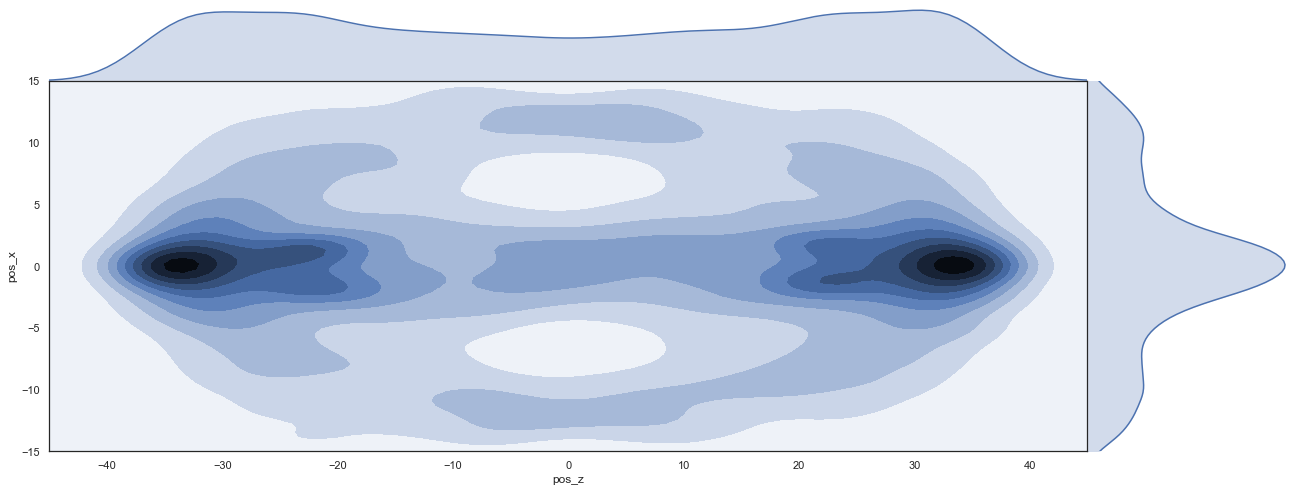

In [86]:
sns.set(style="white")
cmap = sns.cubehelix_palette(start=6.5, light=1, as_cmap=True)
g = sns.jointplot(throws["pos_z"], throws["pos_x"], kind="kde", shade=True, space=0, height=7,ylim=(-15, 15), xlim=(-45, 45))
g.fig.set_figwidth(20)

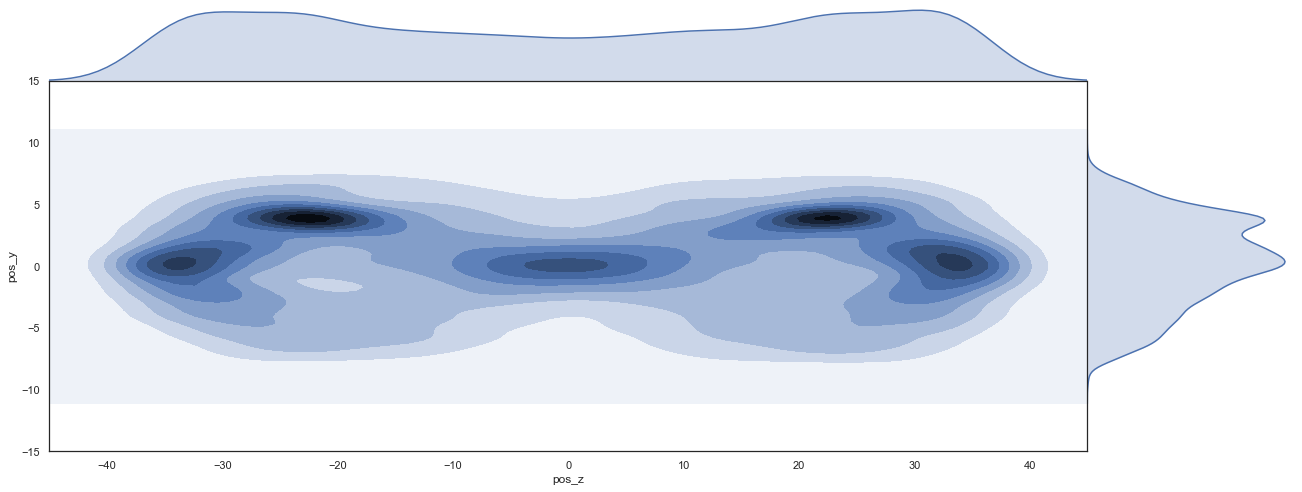

In [87]:
sns.set(style="white")
cmap = sns.cubehelix_palette(start=6.5, light=1, as_cmap=True)
g = sns.jointplot(throws["pos_z"], throws["pos_y"], kind="kde", shade=True, space=0, height=7,ylim=(-15, 15), xlim=(-45, 45))
g.fig.set_figwidth(20)

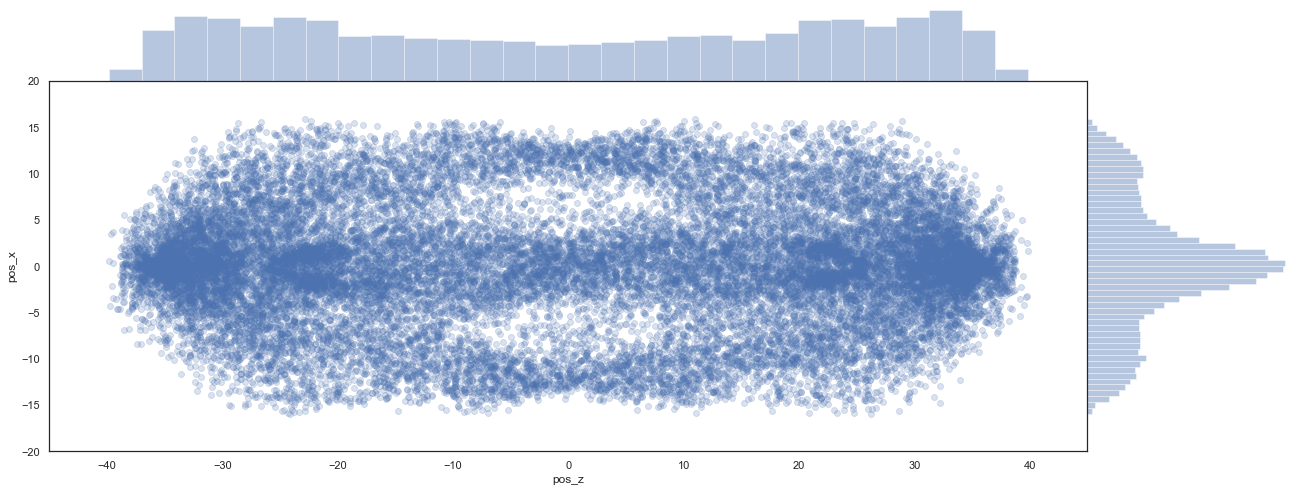

In [96]:
sns.set(style="white")
cmap = sns.cubehelix_palette(start=6.5, light=1, as_cmap=True)
g = sns.jointplot(throws["pos_z"], throws["pos_x"], kind="scatter", space=0, height=7,ylim=(-20, 20), xlim=(-45, 45), alpha=.2)
g.fig.set_figwidth(20)

In [100]:
sns.set(style="white")
cmap = sns.cubehelix_palette(start=6.5, light=1, as_cmap=True)
g = sns.jointplot(throws["pos_z"], throws["pos_y"], kind="scatter", space=0, height=7,ylim=(-20, 20), xlim=(-45, 45), alpha=.1)
g.fig.set_figwidth(20)

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(throws['pos_x'], throws['pos_z'], throws['pos_y'], c='b', s=.1)
ax.view_init(30, 185)
plt.show()

In [23]:

p_throws.sort_values(by="speed", inplace=True)

g = sns.catplot(data=p_throws, x="player_name", y="speed", kind="bar", palette="muted", height=10, aspect=10)
g.set_xticklabels(rotation=90)
g.axes[0][0].yaxis.set_major_locator(MultipleLocator(1))

scorer_name  point_value  disc_speed  goal_distance     pos_x  \
346             Normie-     2.444444    0.000000       7.270883 -1.177667   
83             Caption-     2.000000    0.000000       2.900661 -0.429800   
229       ItchyAnuerism     2.400000    0.000000       5.596598 -0.685400   
230       ItsJustAngelo     2.200000    0.000000       2.683219 -0.765600   
266             Kure_69     2.500000    0.000000       8.549338 -0.445167   
..                  ...          ...         ...            ...       ...   
33              Aphonic     2.857143    6.981017      24.823728  2.254143   
71              C-Jason     2.000000    6.996771       3.481141 -0.001000   
611              furafo     2.500000    7.122960      12.195528 -2.020167   
385            PyroMain     2.375000    7.357644       5.841026 -3.735000   
379  PowerOfInebriation     2.500000    7.551874      13.758380  0.247900   

        pos_y      pos_z  count  
346  0.718889  -9.054556      9  
83   0.512000  13.491600      5  
229  0.351800 -22.809400      5  
230  1.801000   5.217000      5  
266 -0.561333  17.524667      6  
..        ...        ...    ...  
33  -1.094429  -7.162857      7  
71  -0.698286   4.204857      7  
611  0.896667  15.150833      6  
385  0.228000  -4.315125      8  
379 -0.435700   0.862200     20  

[263 rows x 8 columns]

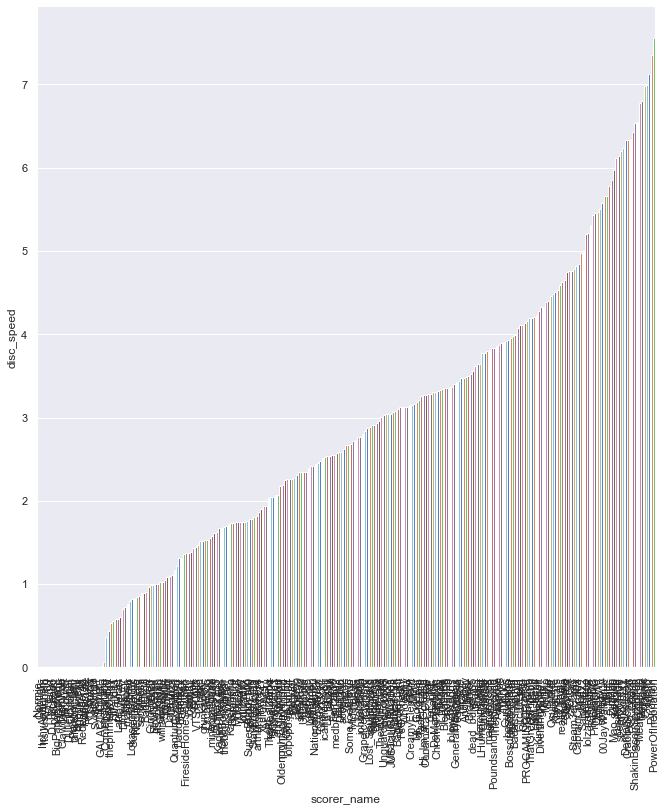

In [44]:
header = ["session_id", "match_time", "scorer_name", "point_value", "disc_speed", "goal_distance", "assist_name", "pos_x", "pos_y", "pos_z", "trajectory"]

goals = pd.read_csv("Goal.csv", names=header)

#goals = goals[goals["disc_speed"] > 0]

p_goals = goals.groupby(["scorer_name"]).mean()
p_goals["count"] = goals.groupby(["scorer_name"]).count()["disc_speed"]
p_goals.reset_index(inplace=True)
p_goals = p_goals[p_goals["count"] > 4]

p_goals.sort_values(by="disc_speed", inplace=True)

display(p_goals)

g = sns.catplot(data=p_goals, x="scorer_name", y="disc_speed", kind="bar", palette="muted", height=10, aspect=1)
g.set_xticklabels(rotation=90)
g.axes[0][0].yaxis.set_major_locator(MultipleLocator(1))

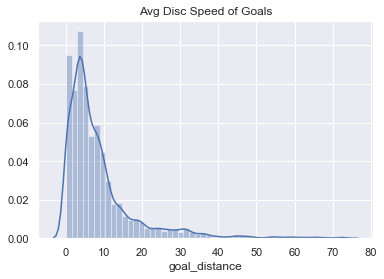

In [48]:
g = sns.distplot(goals["goal_distance"]).set_title("Avg Disc Speed of Goals")

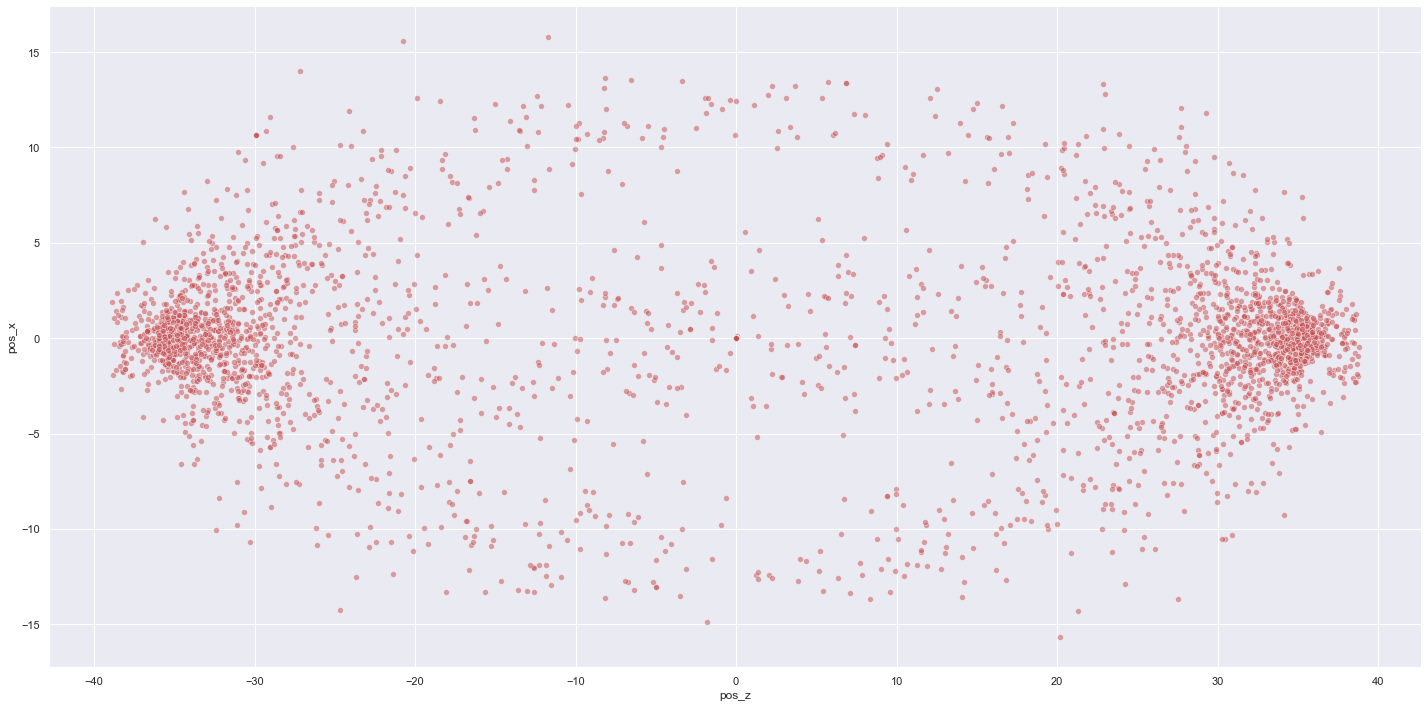

In [60]:
g = sns.relplot(data=goals, y="pos_x", x="pos_z", aspect=2, alpha=.5, color="r", height=10)